In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from google.colab.patches import cv2_imshow
import cv2

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")


('image.jpg', <http.client.HTTPMessage at 0x7d447a121a50>)

# Задание 1 Работа с шумом


1.   Сгенерировать медианный и гаусов шумы на изображении и отобразить
2.   Применить фильтры на зашумленных изображениях (box filter, фильтр гаусса, медианный фильтр)
3. отобразить результаты



In [ ]:
#Ваш код здесь
img = np.array(Image.open("image.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

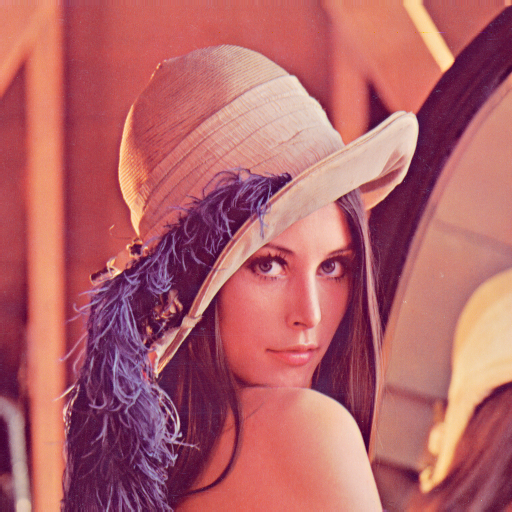

In [ ]:
cv2_imshow(img)

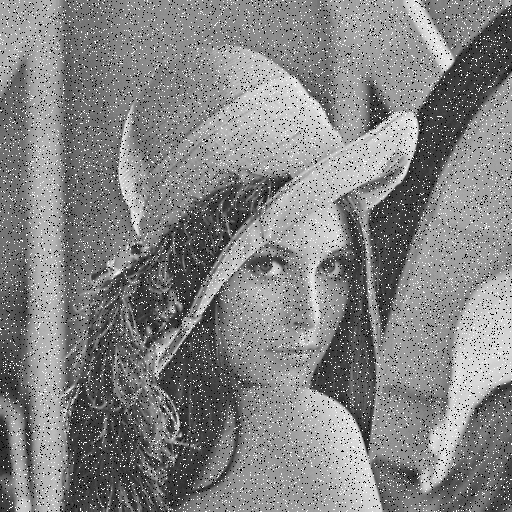

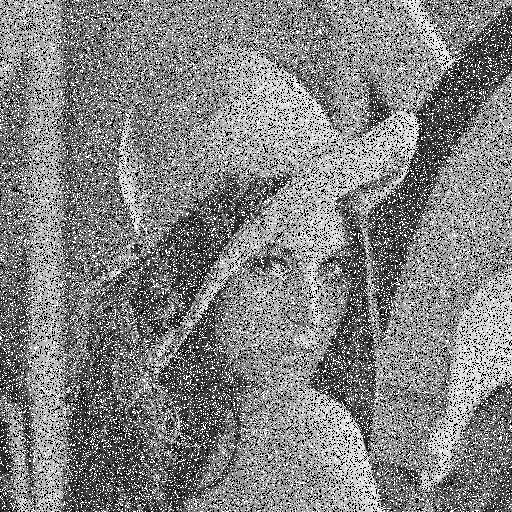

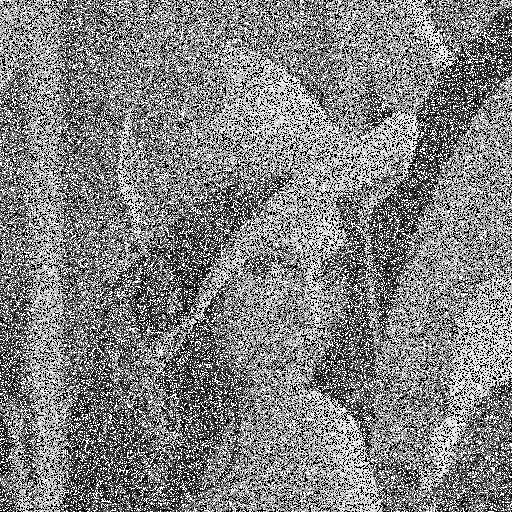

In [ ]:
import random
import copy
#img = cv2.imread(filename)
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
def addSaltPepperNoise(img, SNR):
    img = copy.deepcopy(img)
    size = img.size
    noiseSize = int(size * (1 - SNR))

    for k in range(0, noiseSize):
        xi = int(np.random.uniform(0, img.shape[1]))
        xj = int(np.random.uniform(0, img.shape[0]))
        z = random.randint(0, 1)
        if img.ndim == 2:
            img[xj, xi] = 255*z

    cv2_imshow(img)


addSaltPepperNoise(img, 0.9)
addSaltPepperNoise(img, 0.6)
addSaltPepperNoise(img, 0.3)



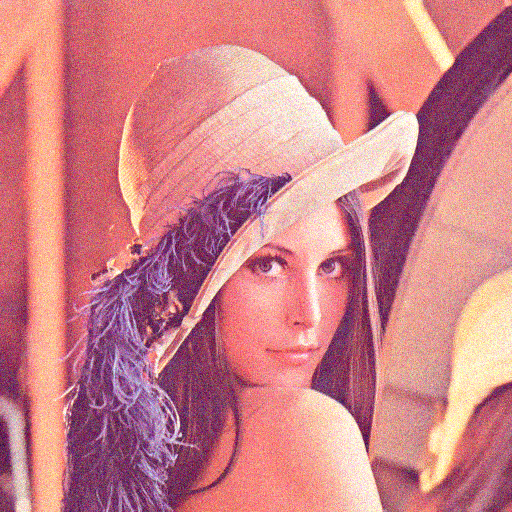

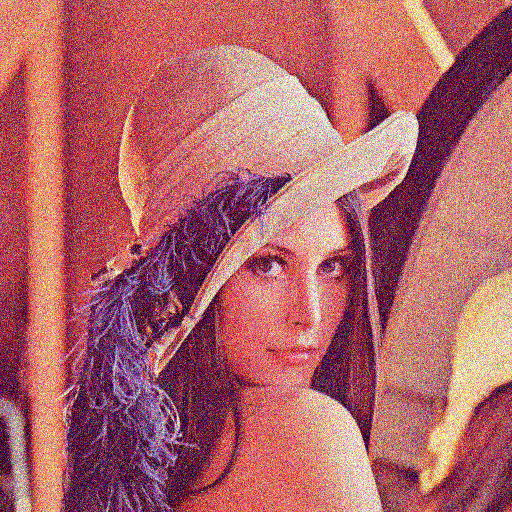

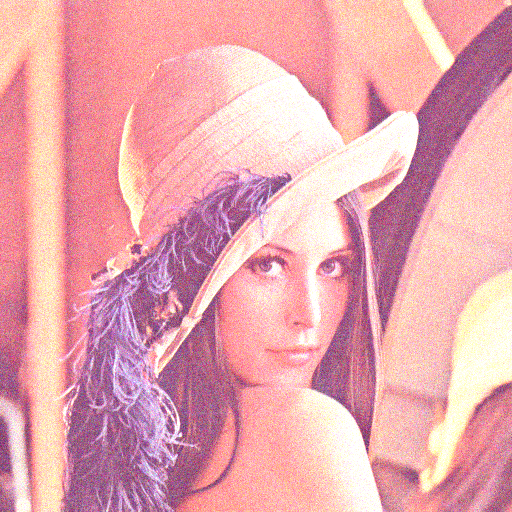

In [ ]:
def add_gaussian_noise(image, mean, std_dev):
    height, width, channel = image.shape
    noise = np.random.normal(mean, std_dev, (height, width, channel))
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

image = cv2.imread('image.jpg')

noisy_image = add_gaussian_noise(image, 30, 20)
cv2_imshow( noisy_image)
noisy_image = add_gaussian_noise(image, 0, 40)
cv2_imshow( noisy_image)
noisy_image = add_gaussian_noise(image, 70, 20)
cv2_imshow( noisy_image)




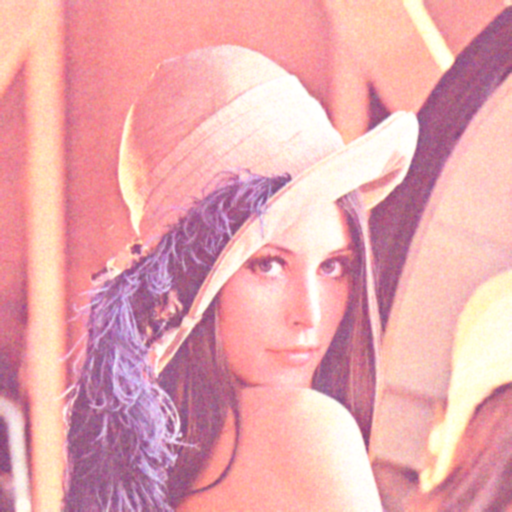

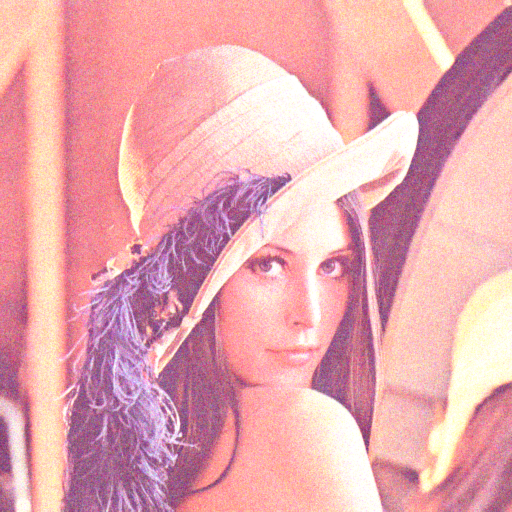

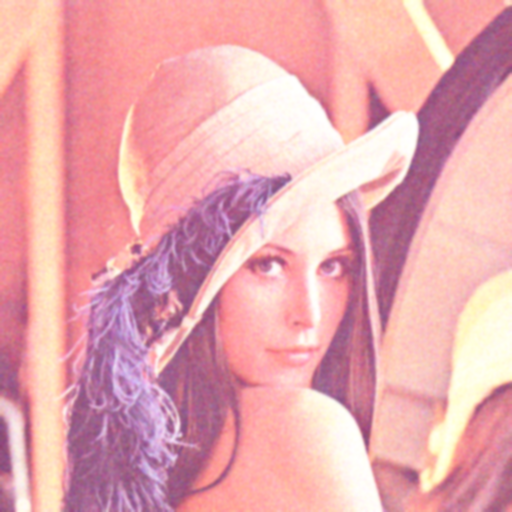

In [ ]:
def apply_gaussian_filter(image, kernel_size, sigma):
  blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
  cv2_imshow(blurred_image)
apply_gaussian_filter(noisy_image, 25, 0.9)
apply_gaussian_filter(noisy_image, 15, 0.5)
apply_gaussian_filter(noisy_image, 75, 1.3)


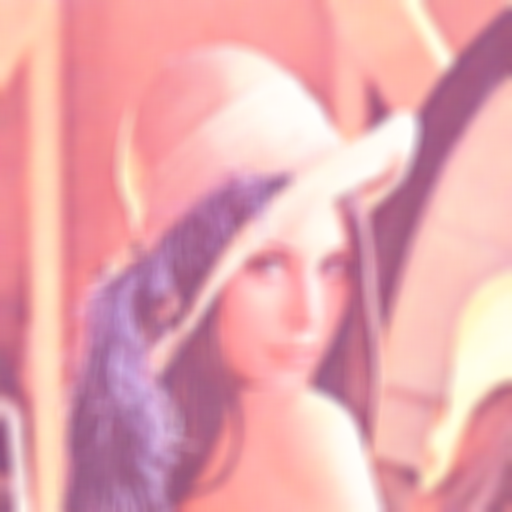

In [ ]:
def apply_box_filter(image, kernel_size):
  blurred_image = cv2.boxFilter(image, -1, (kernel_size, kernel_size))
  cv2_imshow(blurred_image)
apply_box_filter(noisy_image, 15)

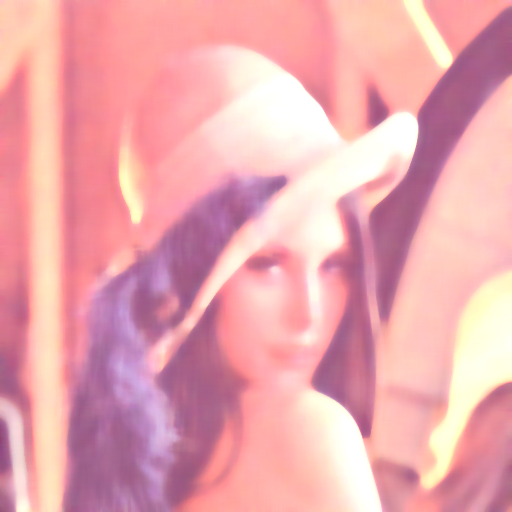

In [ ]:
def apply_median_filter(image, kernel_size):
  filtered_image = cv2.medianBlur(image, kernel_size)
  cv2_imshow(filtered_image)
apply_median_filter(noisy_image, 15)

# Задание 2 Детектор границ Canny



In [ ]:
#Ваш код здесь

Производная по х


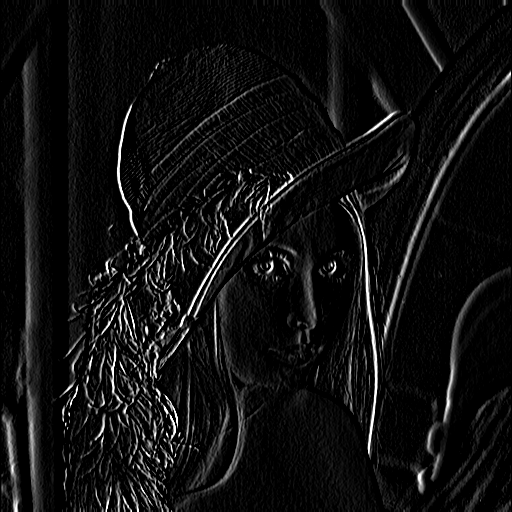

Производная по у


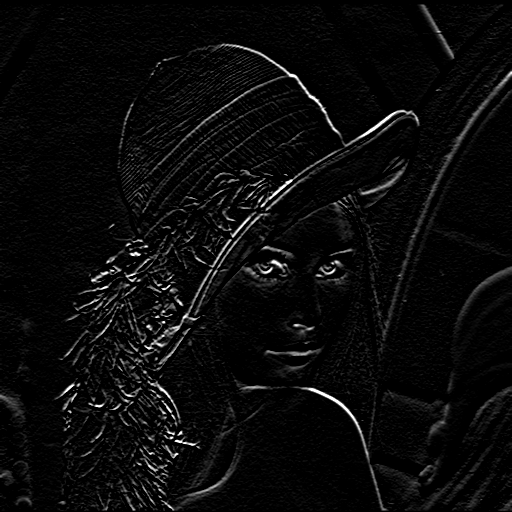

Границы


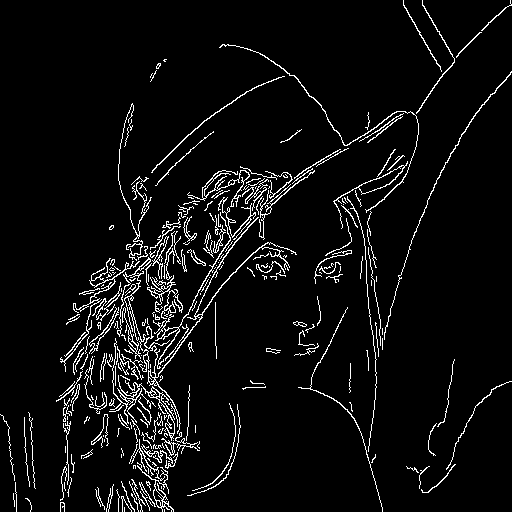

In [ ]:
import cv2
import numpy as np

def apply_canny_edge_detection(image, threshold1, threshold2):
    edges = cv2.Canny(image, threshold1, threshold2)
    return edges

image = cv2.imread('image.jpg', 0)

edges = apply_canny_edge_detection(image, threshold1=100, threshold2=200)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

print('Производная по х')
cv2_imshow(sobelx)
print('Производная по у')
cv2_imshow(sobely)
print('Границы')
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Задание 3 Детектор углов Харриса

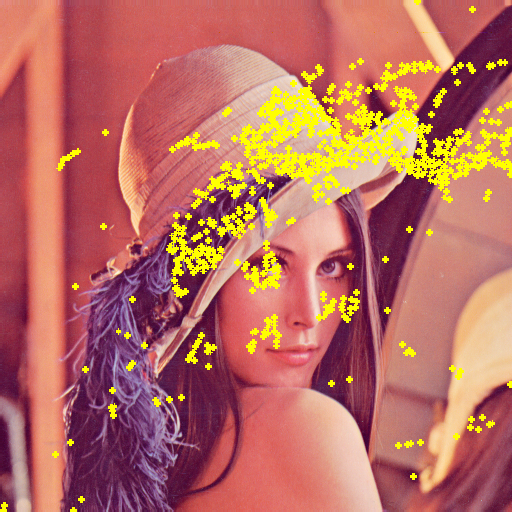

In [ ]:
def draw_cross(image, corners):
  for corner in corners:
    x, y = corner.ravel()
    cv2.drawMarker(image, (x, y), (0, 255, 255), markerType=cv2.MARKER_CROSS, markerSize=5, thickness=1)

def harris_corner_detection(image, threshold):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

  sobel_xx = sobel_x * sobel_x
  sobel_xy = sobel_x * sobel_y
  sobel_yy = sobel_y * sobel_y

  window_size = 3
  sum_xx = cv2.boxFilter(sobel_xx, -1, (window_size, window_size))
  sum_xy = cv2.boxFilter(sobel_xy, -1, (window_size, window_size))
  sum_yy = cv2.boxFilter(sobel_yy, -1, (window_size, window_size))

  k = 0.06
  det = sum_xx * sum_yy - sum_xy * sum_xy
  trace = sum_xx + sum_yy
  harris_response = det - k * (trace ** 2)

  harris_response = cv2.dilate(harris_response, None)
  local_maxima = (harris_response == cv2.dilate(harris_response, None))

  corners = np.argwhere(local_maxima & (harris_response > threshold))

  draw_cross(image, corners)

  return image

img = cv2.imread('image.jpg')

threshold = 1000000
result = harris_corner_detection(img, threshold)

cv2_imshow(result)
